In [11]:
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

In [12]:
# Some functions to plot our points and draw the lines
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s = 100,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    plt.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s = 100,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    plt.xlabel('aack')
    plt.ylabel('beep')
    plt.legend(['happy','sad'])

def draw_line(a,b,c, starting=0, ending=3, **kwargs):
    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    plt.plot(x, -c/b - a*x/b, **kwargs)

def plot_boundary(features, labels, coefficients, intercept):
    # Define the range for the features
    x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
    y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1

    # Generate x values for the line
    xx = np.linspace(x_min, x_max, 100)

    # Calculate corresponding y values using the equation of the line:
    # w0*x0 + w1*x1 + intercept = 0
    # x1 = (-w0*x0 - intercept) / w1
    yy = (-coefficients[0] * xx - intercept) / coefficients[1]

    # Plot the decision boundary (line)
    plt.plot(xx, yy, color='green', linestyle='-', label='Decision Boundary')

    # Re-plot the original points
    # Separate points based on their labels
    features_label0 = features[labels == 0]
    features_label1 = features[labels == 1]

    # Plot points with label 0 as red squares
    plt.scatter(features_label0[:, 0], features_label0[:, 1], c='red', marker='s', label='Label 0')

    # Plot points with label 1 as blue triangles
    plt.scatter(features_label1[:, 0], features_label1[:, 1], c='blue', marker='^', label='Label 1')

    # Add labels and title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary and Data Points')
    plt.legend()
    plt.grid(True)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

In [13]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[3,2],[2,3]])
labels = np.array([0,0,0,0,1,1,1,1])

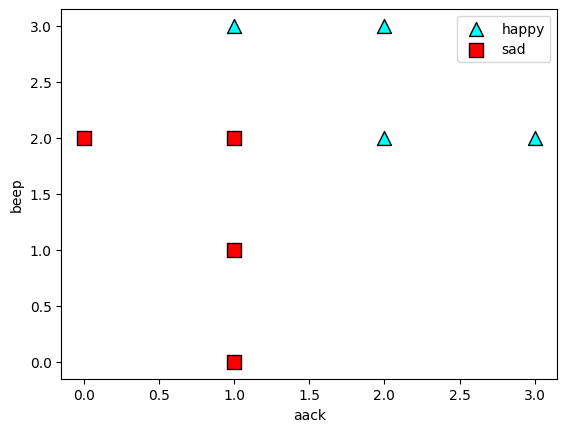

In [14]:
plot_points(features, labels)

In [15]:
def sigmoid(x):
    return np.exp(x)/(1+np.exp(x))

def score(weights, bias, features):
    return np.dot(weights, features) + bias

def prediction(weights, bias, features):
    return sigmoid(score(weights, bias, features))

def log_loss(weights, bias, features, label):
    pred = 1.0*prediction(weights, bias, features)
    return -label*np.log(pred) - (1-label)*np.log(1-pred)

def total_log_loss(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += log_loss(weights, bias, features[i], labels[i])
    return total_error

In [16]:
def logistic_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
    bias += (label-pred)*learning_rate
    return weights, bias

In [17]:
def logistic_regression_algorithm(features, labels, learning_rate = 0.01, epochs = 1000):
    plot_points(features, labels)
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for i in range(epochs):
        # Comment the following line of code to remove the plots of all the classifiers
        draw_line(weights[0], weights[1], bias, color='grey', linewidth=0.1, linestyle='dotted')
        errors.append(total_log_loss(weights, bias, features, labels))
        j = random.randint(0, len(features)-1)
        weights, bias = logistic_trick(weights, bias, features[j], labels[j])
    draw_line(weights[0], weights[1], bias)
    plt.show()
    plt.scatter(range(epochs), errors)
    plt.xlabel('epochs')
    plt.ylabel('error')
    return weights, bias

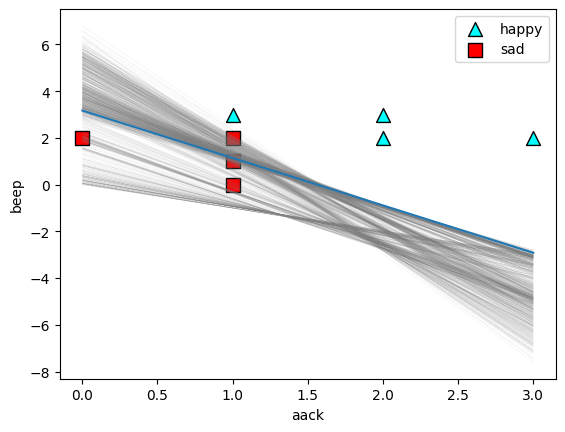

([np.float64(0.9483304034551162), np.float64(0.4671434568701278)],
 np.float64(-1.481773093155085))

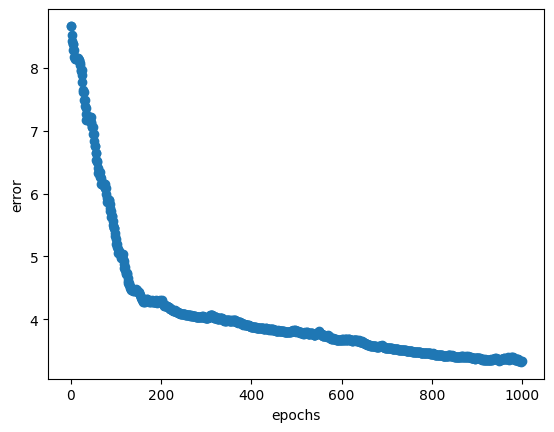

In [18]:
logistic_regression_algorithm(features, labels)